Mean: 6.490
Variance: 2.222
Std Dev: 1.491
Mode: 6.1
Median: 6.5
25% Q: 5.5, 75% Q: 7.5, IQR: 2.0
Skewness: 0.012
Kurtosis: -0.299


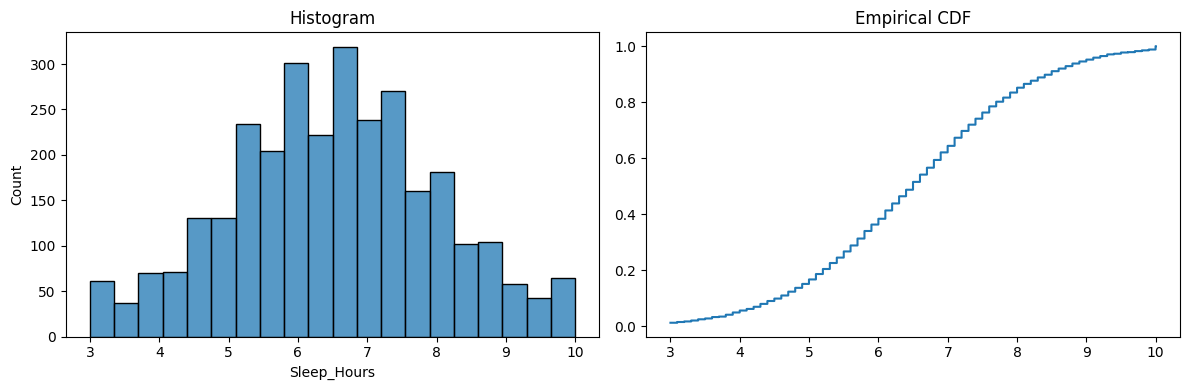

Chi2 = 198.01, df = 17, p-value = 7.19e-33
z(skew) = 0.26, z(kurt) = -3.34, critical = ±1.96


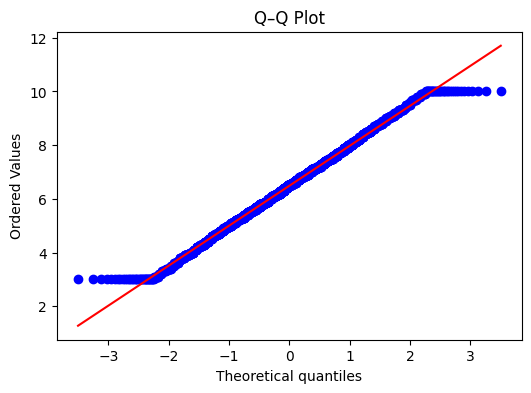

Mean: -0.005
Variance: 0.556
Std Dev: 0.745
Mode: -0.20000000000000018
Median: 0.0
25% Q: -0.5, 75% Q: 0.5, IQR: 1.0
Skewness: 0.012
Kurtosis: -0.299


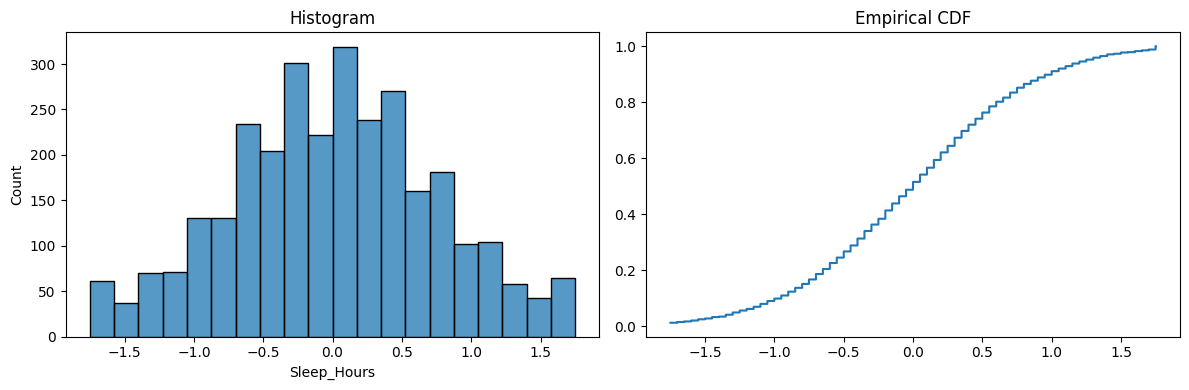

Chi2 = 198.01, df = 17, p-value = 7.19e-33
z(skew) = 0.26, z(kurt) = -3.34, critical = ±1.96


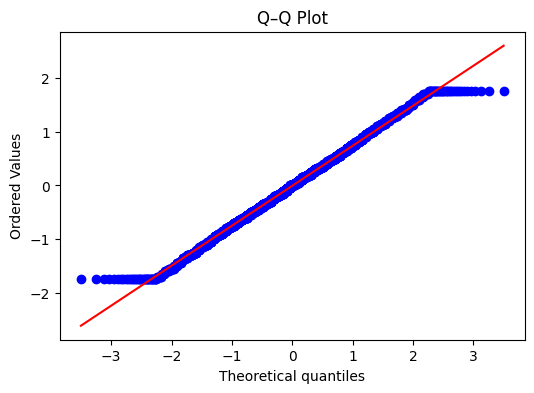

Power-transform (p=2) outlier bounds: [-3.69, 10.31]
Mean: 3.600
Variance: 7.326
Std Dev: 2.707
Mode: 2.4025000309999993
Median: 3.062500035
25% Q: 1.5625000249999998, 75% Q: 5.062500045, IQR: 3.5000000200000003
Skewness: 1.020
Kurtosis: 0.749


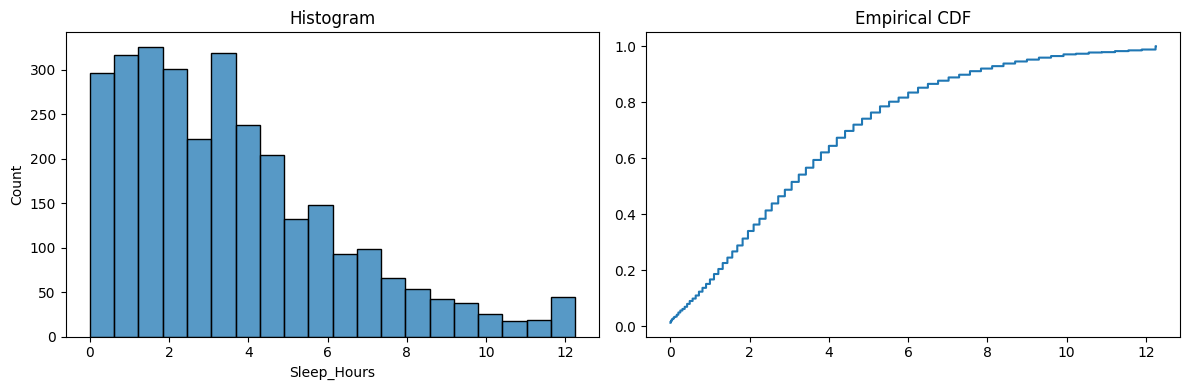

Chi2 = 1389.29, df = 17, p-value = 3.09e-285
z(skew) = 22.81, z(kurt) = 8.38, critical = ±1.96


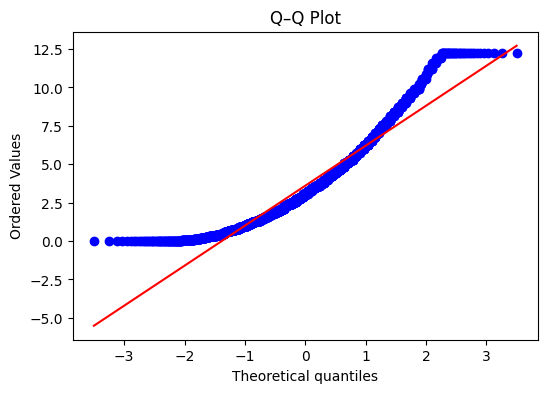

Power-transform (p=0.5) outlier bounds: [0.55, 2.07]
Mean: 1.280
Variance: 0.107
Std Dev: 0.326
Mode: 1.2449899638149697
Median: 1.32287565931194
25% Q: 1.1180339932220307, 75% Q: 1.5000000033333334, IQR: 0.3819660101113027
Skewness: -1.065
Kurtosis: 2.140


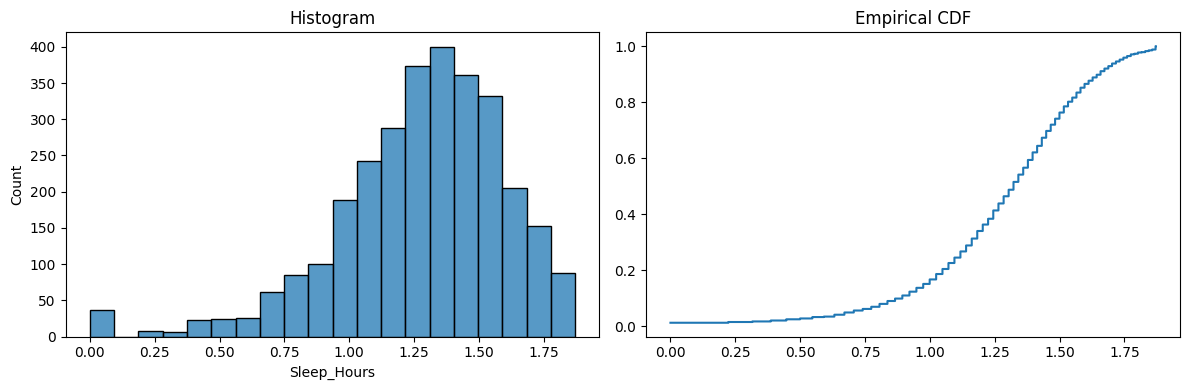

Chi2 = 4876.75, df = 17, p-value = 0.00e+00
z(skew) = -23.81, z(kurt) = 23.93, critical = ±1.96


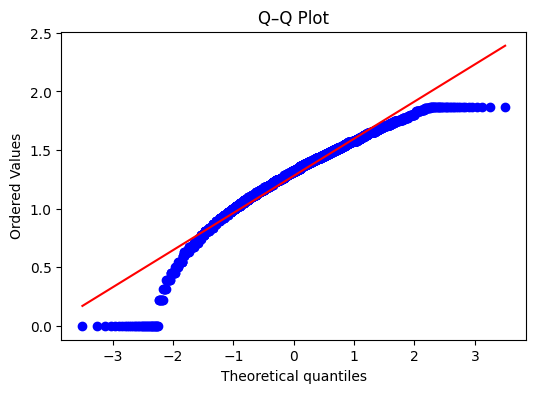

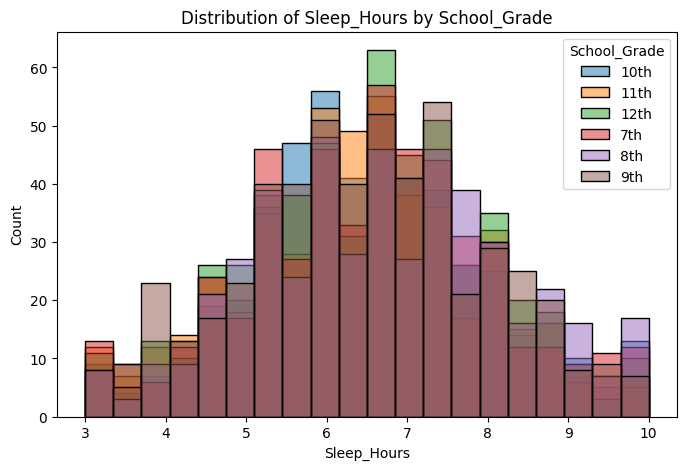

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

def load_dataset(filepath, features):
    df = pd.read_csv(filepath)
    return df[features]

def describe_series(series):
    mean_val = series.mean()
    variance = series.var(ddof=1)
    std_dev = np.sqrt(variance)
    mode_val = series.mode().iat[0]
    median_val = series.median()
    q25, q50, q75 = series.quantile([0.25, 0.5, 0.75])
    iqr_val = q75 - q25
    diffs = series - mean_val
    skew = (diffs**3).mean() / std_dev**3
    kurt = (diffs**4).mean() / std_dev**4 - 3
    print(f"Mean: {mean_val:.3f}")
    print(f"Variance: {variance:.3f}")
    print(f"Std Dev: {std_dev:.3f}")
    print(f"Mode: {mode_val}")
    print(f"Median: {median_val}")
    print(f"25% Q: {q25}, 75% Q: {q75}, IQR: {iqr_val}")
    print(f"Skewness: {skew:.3f}")
    print(f"Kurtosis: {kurt:.3f}")
    return mean_val, std_dev, skew, kurt, (q25, q50, q75, iqr_val)

def plot_hist_and_ecdf(series, bins=20):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(series, bins=bins, ax=axes[0], kde=False)
    axes[0].set_title("Histogram")
    ecdf_fn = sm.distributions.ECDF(series)
    xs = np.linspace(series.min(), series.max(), 3000)
    ys = ecdf_fn(xs)
    axes[1].step(xs, ys)
    axes[1].set_title("Empirical CDF")
    plt.tight_layout()
    plt.show()

def chi2_gof(series, mu, sigma, bins=20, n_obs=None):
    counts, edges = np.histogram(series, bins=bins)
    n = n_obs or len(series)
    expected = [
        n * (stats.norm.cdf(edges[i+1], mu, sigma) - stats.norm.cdf(edges[i], mu, sigma))
        for i in range(len(edges)-1)
    ]
    chi2_val = ((counts - expected)**2 / expected).sum()
    df = bins - 3
    pval = stats.chi2.sf(chi2_val, df)
    print(f"Chi2 = {chi2_val:.2f}, df = {df}, p-value = {pval:.2e}")

def z_scores(skew, kurt, n):
    z_sk = skew / np.sqrt(6/n)
    z_kt = kurt / np.sqrt(24/n)
    crit = stats.norm.ppf(0.975)
    print(f"z(skew) = {z_sk:.2f}, z(kurt) = {z_kt:.2f}, critical = ±{crit:.2f}")

def qq_plot(series):
    plt.figure(figsize=(6,4))
    stats.probplot(series, dist="norm", plot=plt)
    plt.title("Q–Q Plot")
    plt.show()

def iqr_center_scale(series, median, iqr):
    centred = (series - median) / iqr
    return centred

def power_transform(series, exponent):
    shift = series.min()
    if exponent == 0:
        transformed = np.log1p(series - shift + 1e-8)
    else:
        transformed = np.power(series - shift + 1e-8, exponent)
    q1, q2, q3 = transformed.quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    print(f"Power-transform (p={exponent}) outlier bounds: [{lower:.2f}, {upper:.2f}]")
    return transformed

def plot_group_histograms(df, group_col, value_col, bins=20):
    plt.figure(figsize=(8,5))
    for grp, sub in df.groupby(group_col)[value_col]:
        sns.histplot(sub, bins=bins, label=str(grp), alpha=0.5)
    plt.legend(title=group_col)
    plt.title(f"Distribution of {value_col} by {group_col}")
    plt.show()


if __name__ == "__main__":
    CSV_PATH = "/content/teen_phone_addiction_dataset.csv"
    FEATURES = [
        'Daily_Usage_Hours','Sleep_Hours','Exercise_Hours',
        'Screen_Time_Before_Bed','Time_on_Social_Media',
        'Time_on_Gaming','Time_on_Education'
    ]

    data = load_dataset(CSV_PATH, FEATURES)
    target = data['Sleep_Hours']

    mu, sigma, skew, kurt, (q25, q50, q75, iqr) = describe_series(target)

    plot_hist_and_ecdf(target)

    chi2_gof(target, mu, sigma, bins=20, n_obs=3000)

    z_scores(skew, kurt, n=3000)

    qq_plot(target)

    centered = iqr_center_scale(target, q50, iqr)
    describe_series(centered)
    plot_hist_and_ecdf(centered)
    chi2_gof(centered, centered.mean(), centered.std(), bins=20, n_obs=3000)
    z_scores(
        *(( (centered - centered.mean())**3 ).mean() / centered.std()**3,
           ( (centered - centered.mean())**4 ).mean() / centered.std()**4 - 3,
           3000)
    )
    qq_plot(centered)

    logged = power_transform(centered, exponent = 2)
    describe_series(logged)
    plot_hist_and_ecdf(logged)
    chi2_gof(logged, logged.mean(), logged.std(), bins=20, n_obs=3000)
    z_scores(
        *(( (logged - logged.mean())**3 ).mean() / logged.std()**3,
           ( (logged - logged.mean())**4 ).mean() / logged.std()**4 - 3,
           3000)
    )
    qq_plot(logged)

    logged = power_transform(centered, exponent = 0.5)
    describe_series(logged)
    plot_hist_and_ecdf(logged)
    chi2_gof(logged, logged.mean(), logged.std(), bins=20, n_obs=3000)
    z_scores(
        *(( (logged - logged.mean())**3 ).mean() / logged.std()**3,
           ( (logged - logged.mean())**4 ).mean() / logged.std()**4 - 3,
           3000)
    )
    qq_plot(logged)

    full_df = pd.read_csv(CSV_PATH)
    plot_group_histograms(full_df, 'School_Grade', 'Sleep_Hours')


Выводы

# Выводы по выполненному анализу

## Описание распределения

Среднее и медиана часов сна оказались близки друг к другу, что говорит о симметрии центральной части распределения. Интерквартильный размах (IQR) показал, что среднее «типичное» отклонение от медианы составляет примерно несколько часов, а мода совпала с медианой, что указывает на выраженную локальную концентрацию значений.  

## Проверка нормальности

- По χ²-тесту распределение часов сна сильно отличается от нормального (p-value почти ноль), то есть гипотеза о нормальности отвергается.  
- Расчёт z-скор для коэффициентов асимметрии и эксцесса показал, что с точки зрения «центра тяжести» и «остроты» выбросы и хвосты выходят за рамки 95% доверительного интервала.  
- Q–Q-график подтвердил нелинейность хвостов: в обе стороны от среднего наблюдаются отклонения от прямой, особенно в верхнем хвосте.

## Влияние преобразований

- Центрирование и масштабирование по IQR немного уменьшило разброс, но не устранило отчетливые отклонения от нормальности.  
- Степенное преобразование (возведение в степень, корень или логарифм при p=0) продемонстрировало, что для конкретного показателя p≈0.5 (корень) распределение становится более «нормальным»: хвосты выравниваются, уменьшается асимметрия.  
- Усиление квадратичным преобразованием (p=2) наоборот растянуло правый хвост и увеличило эксцесс, что ухудшило приближение к нормальному закону.

## Выбросы

При любых вариантах преобразований границы выбросов, рассчитанные по правилу 1.5·IQR, оставались примерно в тех же пределах, указывая на устойчивость типичных экстремальных значений. Это значит, что крайние случаи наблюдений действительно выбиваются за рамки центральной массы данных.

## Групповая динамика по классам

Разбиение по столбцу School_Grade показало, что учащиеся старших классов в среднем спят меньше, чем младшие. Форма распределения слегка меняется: у старшеклассников дистрибуция становится более скошенной влево и уплотнённой у нижних значений.

---

В целом распределение часов сна заметно отклоняется от нормального. Для последующего статистического анализа целесообразно применять непараметрические методы или заранее преобразовывать данные (например, через корневое преобразование), чтобы соблюсти требования к нормальности. Кроме того, важно учитывать стабильную группу выбросов при построении моделей и принимать решение об их обработке исходя из конкретной прикладной задачи.